In [1]:
#pip install the geopy package for latitudes and longitudes
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim #for fetching latitude and longitude
from time import sleep

%matplotlib inline

In [4]:
#Loading the datasets obtained from Kaggle
#These can be found at https://www.kaggle.com/datasets/datafiniti/hotel-reviews
reviews1 = pd.read_csv("Datafiniti_Hotel_Reviews.csv")
reviews2 = pd.read_csv("Datafiniti_Hotel_Reviews_Jun19.csv")
reviews3 = pd.read_csv("7282_1.csv")

In [5]:
#Number of columns is not identical - need to investigate before joining datasets
print(f'reviews1 shape is {reviews1.shape}')
print(f'reviews2 shape is {reviews2.shape}')
print(f'reviews3 shape is {reviews3.shape}')

reviews1 shape is (10000, 25)
reviews2 shape is (10000, 26)
reviews3 shape is (35912, 19)


In [6]:
#Differences between column names
cols1=reviews1.columns.tolist()
cols2=reviews2.columns.tolist()
cols3=reviews3.columns.tolist()
cols1.sort()
cols2.sort()
cols3.sort()

cols1 = pd.Index(cols1)
cols2 = pd.Index(cols2)
cols3 = pd.Index(cols3)

cols1cols2 = cols1.difference(cols2).tolist()
cols1cols3 = cols1.difference(cols3).tolist()
cols2cols1 = cols2.difference(cols1).tolist()
cols2cols3 = cols2.difference(cols3).tolist()
cols3cols1 = cols3.difference(cols1).tolist()
cols3cols2 = cols3.difference(cols2).tolist()

print("Comparing differences between reviews1 and reviews2: ")
print(f"Compared to reviews1, reviews2 lacks these columns: {cols1cols2}")
print(f"Compared to review2, reviews1 lacks these columns: {cols2cols1}")
print()
print("Comparing differences between reviews1 and reviews3: ")
print(f"Compared to reviews1, reviews3 lacks these columns: {cols1cols3}")
print(f"Compared to reviews3, reviews1 lacks these columns: {cols3cols1}")
print()
print("Comparing differences between reviews2 and reviews3: ")
print(f"Compared to reviews2, reviews3 lacks these columns: {cols2cols3}")
print(f"Compared to reviews3, reviews2 lacks these columns: {cols3cols2}")

Comparing differences between reviews1 and reviews2: 
Compared to reviews1, reviews2 lacks these columns: []
Compared to review2, reviews1 lacks these columns: ['reviews.dateAdded']

Comparing differences between reviews1 and reviews3: 
Compared to reviews1, reviews3 lacks these columns: ['dateAdded', 'dateUpdated', 'id', 'keys', 'primaryCategories', 'reviews.dateSeen', 'reviews.sourceURLs', 'sourceURLs', 'websites']
Compared to reviews3, reviews1 lacks these columns: ['reviews.dateAdded', 'reviews.doRecommend', 'reviews.id']

Comparing differences between reviews2 and reviews3: 
Compared to reviews2, reviews3 lacks these columns: ['dateAdded', 'dateUpdated', 'id', 'keys', 'primaryCategories', 'reviews.dateSeen', 'reviews.sourceURLs', 'sourceURLs', 'websites']
Compared to reviews3, reviews2 lacks these columns: ['reviews.doRecommend', 'reviews.id']


In [7]:
#not entire match in data types, but pd.concat() should be able to tolerate this
df = pd.DataFrame([reviews1.dtypes, reviews2.dtypes, reviews3.dtypes])
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,reviews.dateAdded,reviews.doRecommend,reviews.id
0,object,object,object,object,object,object,object,object,object,float64,...,object,object,object,object,object,object,object,NaN,NaN,NaN
1,object,object,object,object,object,object,object,object,object,float64,...,object,object,object,object,object,object,object,float64,NaN,NaN
2,NaN,NaN,NaN,object,object,NaN,object,object,NaN,float64,...,object,object,object,object,object,NaN,NaN,object,float64,float64


In [8]:
#Overview (five rows) of reviews1
reviews1.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [9]:
#Overview (five rows) of reviews2
reviews2.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [10]:
#Overview (five rows) of reviews3
reviews3.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [11]:
#The columns are overall similar, so it is acceptable to concatente datasets

#concatenating the data frames
frames = [reviews1, reviews2, reviews3]

reviews = pd.concat(frames)

#concat keeps the original indexes from dataframes
# -> use reset_index for assigning unique indexes
reviews.reset_index(inplace=True)

#reset_index results in the formation of a unique index column that contains original indexes
#-> drop the index column
reviews.drop(columns="index", inplace=True)

In [12]:
# Checking that the column was successfully dropped
try:
    reviews.drop(columns=["index"], inplace = False)
except:
    print("already dropped")

already dropped


In [13]:
#Checking that the indexes are unique
reviews["name"][0]
#If the index was not unique, this would return 3 results (from 3 datasets) instead of 1

'Rancho Valencia Resort Spa'

In [14]:
#The new number of rows is a sum of the rows from reviews1, reviews2, reviews3
#This means there are no duplicates in the dataset - otherwise .concat() would remove them

print(f"shape of reviews1 is {reviews1.shape}")
print(f"shape of reviews2 is {reviews2.shape}")
print(f"shape of reviews3 is {reviews3.shape}")
print(f"shape of reviews is {reviews.shape}")
reviews.shape

shape of reviews1 is (10000, 25)
shape of reviews2 is (10000, 26)
shape of reviews3 is (35912, 19)
shape of reviews is (55912, 28)


(55912, 28)

In [15]:
#The data types of reviews are appropriate
reviews.dtypes

id                       object
dateAdded                object
dateUpdated              object
address                  object
categories               object
primaryCategories        object
city                     object
country                  object
keys                     object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateSeen         object
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
sourceURLs               object
websites                 object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
dtype: object

In [16]:
#Overview (five rows) of reviews
reviews.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,reviews.dateAdded,reviews.doRecommend,reviews.id
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,NaN,NaN,NaN
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,NaN,NaN,NaN
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,NaN,NaN,NaN
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,NaN,NaN,NaN
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,NaN,NaN,NaN


**Redundant columns**

In [17]:
#Dropping websites, keys and id as these are not relevant - I will generate my own keys later
reviews.drop(columns=["reviews.sourceURLs", "sourceURLs", "websites", "keys", "id"], inplace = True)

In [18]:
# Checking that the columns were successfully dropped
try:
    reviews.drop(columns=["reviews.sourceURLs", "sourceURLs", "websites", "keys", "ids"], inplace = False)
except:
    print("already dropped")

already dropped


**Investigating nulls**

In [19]:
#counting nulls
nulls= reviews.isnull().sum()

#caulculating the percentage of nulls
perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

dateAdded                64.229504
dateUpdated              64.229504
address                   0.000000
categories                0.000000
primaryCategories        64.229504
city                      0.000000
country                   0.000000
latitude                  0.153813
longitude                 0.153813
name                      0.000000
postalCode                0.098369
province                  0.000000
reviews.date              0.463228
reviews.dateSeen         64.229504
reviews.rating            1.541708
reviews.text              0.041136
reviews.title             2.904564
reviews.userCity         45.580555
reviews.userProvince     45.948991
reviews.username          0.076907
reviews.dateAdded        35.770496
reviews.doRecommend     100.000000
reviews.id              100.000000
dtype: float64

**Reviews.doRecommend** and **reviews.id** are **empty** (100% nulls)

In [20]:
nulls= reviews[["reviews.doRecommend", "reviews.id"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

reviews.doRecommend    100.0
reviews.id             100.0
dtype: float64

In [21]:
#Dropping reviews.doRecommend and reviews.id because these are empty
reviews.drop(columns=["reviews.doRecommend", "reviews.id"], inplace = True)

In [22]:
# Checking that the columns were successfully dropped
try:
    reviews.drop(columns=["reviews.doRecommend", "reviews.id"], inplace = False)
except:
    print("already dropped")

already dropped


**Reviews.rating, reviews.text,** and **reviews.title** nulls are **less than 3%** of the dataset

In [23]:
nulls= reviews[["reviews.rating", "reviews.text", "reviews.title"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

reviews.rating    1.541708
reviews.text      0.041136
reviews.title     2.904564
dtype: float64

In [24]:
#Dropping reviews.rating, reviews.text, reviews.title nulls
# (These are no more than 5% of the total dataset, and accuracy of these is important for future investigations, so dropping them is the smartest choice)

reviews.dropna(subset = ["reviews.rating", "reviews.text", "reviews.title"], inplace = True)

#resetting the index after dropping rows because row indexes do not automatically reset
#-> I will often rely on sequential indexes in my investigations, so this is important

reviews.reset_index(inplace=True)
reviews.drop(columns="index", inplace=True)

In [25]:
#Checking that nulls were dropped
nulls= reviews[["reviews.rating", "reviews.text", "reviews.title"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

reviews.rating    0.0
reviews.text      0.0
reviews.title     0.0
dtype: float64

In [26]:
#No. rows after dropping rows from reviews.rating and reviews.text
reviews.shape[0]

54152

**Filling in the latitude and longitude nulls** (0.048013%)

In [27]:
#Nulls overview
nulls= reviews[["latitude", "longitude"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

latitude     0.048013
longitude    0.048013
dtype: float64

In [28]:
#Finding indexes where longitude is null

counter=-1 #counter will serve for identifying unique indexes
refslong=[] #empty list to store the indexes

#when longitude is a null, the index(counter) is appended to refslong
for i in reviews["longitude"].isnull():
    counter+=1
    if i==True:
        refslong.append(counter)

#printing nulls and the length of the dataset
print(refslong)
print(len(refslong))

[20996, 20997, 20998, 20999, 21000, 21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012, 21013, 21014, 21015, 28373, 28374, 33600, 33837, 33838, 35193]
26


In [29]:
#Finding indexes where latitude is null
# -> same logic as for "Finding indexes where longitude is null" above

counter=-1
refslat=[]
for i in reviews["latitude"].isnull():
    counter+=1
    if i==True:
        refslat.append(counter)

print(refslat)
print(len(refslat))


#Differences between lists
refslat = pd.Index(refslat)
refslong = pd.Index(refslong)

print(f'Compared to latitude, longitude lacks: {refslat.difference(refslong).tolist()}')
print(f'Compared to longitude, latitude lacks: {refslong.difference(refslat).tolist()}')

#When longitude is missing, the latitude is missing (and vice versa)

[20996, 20997, 20998, 20999, 21000, 21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012, 21013, 21014, 21015, 28373, 28374, 33600, 33837, 33838, 35193]
26
Compared to latitude, longitude lacks: []
Compared to longitude, latitude lacks: []


In [30]:
#Using city (and country) to determine latitude and longitude

#creating a new list that contains city names for indexes that lack latitude and longitude
# -> indexes that lack latitude and longitude are in refslat/refslong
location =[]
for i in refslat:
    location.append(reviews.loc[i, ["city"]])
location[0:3]

[city    Boston
 Name: 20996, dtype: object, city    Boston
 Name: 20997, dtype: object, city    Boston
 Name: 20998, dtype: object]

In [31]:
#converting the list to a dataframe
location = pd.DataFrame(location)
location.head()

,city
20996,Boston
20997,Boston
20998,Boston
20999,Boston
21000,Boston


In [32]:
#Country is always US in the reviews dataset
reviews["country"].unique()

array(['US'], dtype=object)

In [34]:
#Nominatim API allows finding latitude and longitude based on city and country information

#calling the Nominatim API by assigning a random user_agent
geolocator = Nominatim(user_agent="my_user_agent")
city ="Boston"
country ="Us"
loc = geolocator.geocode(city+','+ country)
print("latitude is:" ,loc.latitude,"\nlongtitude is:" ,loc.longitude)

latitude is: 42.3554334 
longtitude is: -71.060511


In [35]:
#Leveraging the Nominatim API to find the correct latitude and longitude for each unique row index
geolocator = Nominatim(user_agent="my_user_agent")

#creating empty lists for appending latitude and longitude
latitude=[]
longitude=[]

#creating a loop that appends the latitude and longitude based on the city and country information
for i in location["city"]:
    country ="Us"
    loc = geolocator.geocode(i+','+ country)
    #Nominatim restricts heavy usage (allows only 1 request per second) - using sleep() to accommodate this
    sleep(1)
    latitude.append(loc.latitude)
    sleep(1)
    longitude.append(loc.longitude)

#Adding the lists to the location dataframe as new columns
location["latitude"] = latitude
location["longitude"] = longitude
location.head()

,city,latitude,longitude
20996,Boston,42.355433,-71.060511
20997,Boston,42.355433,-71.060511
20998,Boston,42.355433,-71.060511
20999,Boston,42.355433,-71.060511
21000,Boston,42.355433,-71.060511


In [36]:
#Filling in the latitude and longitude nulls based on indexes
# -> indexes that lack latitude and longitude are in refslat/refslong
for i in refslat:
    reviews.loc[i, ["latitude"]] = location.loc[i, ["latitude"]]
    reviews.loc[i, ["longitude"]] = location.loc[i, ["longitude"]]

In [37]:
#Checking that nulls are filled
nulls= reviews[["latitude", "longitude"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

latitude     0.0
longitude    0.0
dtype: float64

**Date nulls**

In [38]:
#Nulls overview
nulls= reviews[["dateAdded", "reviews.date", "reviews.dateSeen", "reviews.dateAdded", "dateUpdated"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

dateAdded            63.072463
reviews.date          0.068326
reviews.dateSeen     63.072463
reviews.dateAdded    36.927537
dateUpdated          63.072463
dtype: float64

Postulated data dictionary based on the dictionary from the Datafiniti website (datasets originate from Datafiniti):
 -dateAdded: The date this business was first added to the business database.
 -reviews.date: The date the review was posted.
 -reviews.dateSeen: The date when the review was seen by Datafiniti.
 -reviews.dateAdded: The date this reviews was first added to the reviews database.
 -date.Updated: The most recent date this business was updated or seen by the Datafiniti system.

In [39]:
#Checking the data dictionary from the Datafiniti website suggests that reviews.date column is the most relevant column for this project

#Dropping redundant dates
reviews.drop(columns=["dateAdded", "reviews.dateSeen", "reviews.dateAdded", "dateUpdated"], inplace=True)

In [40]:
# Checking that the columns were successfully dropped
try:
    reviews.drop(columns=["dateAdded", "reviews.dateSeen", "reviews.dateAdded", "dateUpdated"], inplace = False)
except:
    print("already dropped")

already dropped


In [41]:
#reviews.date overview
reviews["reviews.date"].head()

0    2013-11-14T00:00:00Z
1    2014-07-06T00:00:00Z
2    2015-01-02T00:00:00Z
3    2016-05-15T00:00:00Z
4    2016-07-09T00:00:00Z
Name: reviews.date, dtype: object

In [42]:
#Converting reviews.date into a date data type
reviews["reviews.date"] = pd.to_datetime(reviews["reviews.date"])
reviews["reviews.date"].head()

0   2013-11-14 00:00:00+00:00
1   2014-07-06 00:00:00+00:00
2   2015-01-02 00:00:00+00:00
3   2016-05-15 00:00:00+00:00
4   2016-07-09 00:00:00+00:00
Name: reviews.date, dtype: datetime64[ns, UTC]

In [43]:
#Checking no. when the time of reviews.date is not 00:00:00+00:00 based on minutes
reviews["reviews.date"][reviews["reviews.date"].dt.minute>0.0].count()

29

In [44]:
#Checking no. when the time of reviews.date is not 00:00:00+00:00 based on hours
reviews["reviews.date"][reviews["reviews.date"].dt.hour>0.0].count()

683

In [45]:
#getting rid of time in datetime because in most cases the time is not informative (00:00:00+00:00)
reviews["reviews.date"] = pd.to_datetime(reviews["reviews.date"]).dt.date
reviews["reviews.date"].head(1)

0    2013-11-14
Name: reviews.date, dtype: object

In [46]:
# Converting reviews.date back into a date data type
# Note: dt is a pandas attribute, not a datetime attribute
reviews["reviews.date"] = pd.to_datetime(reviews["reviews.date"])
reviews["reviews.date"].head(1)

0   2013-11-14
Name: reviews.date, dtype: datetime64[ns]

In [48]:
#Checking the mode that will be used to fill in reviews.date
mode=reviews["reviews.date"].mode()
mode[0]

Timestamp('2016-06-27 00:00:00')

In [49]:
#Filling the nulls in reviews.date with the most common occurring date
reviews["reviews.date"].fillna(value=mode[0], inplace=True)

#This may not be the most accurate use of fillna(), but dates are not crucial in this investigation, so it might be more beneficial to fill them in with .mode() than to drop rows at the expense of other columns
#Alternatively, nulls are less than 0.5%, so it would have also been acceptable to drop rows

In [50]:
#Overview
reviews[["reviews.date"]].head()

,reviews.date
0,2013-11-14
1,2014-07-06
2,2015-01-02
3,2016-05-15
4,2016-07-09


**primaryCategories**

In [53]:
#Nulls overview
nulls= reviews["primaryCategories"].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

63.072462697591966

In [54]:
#dropping primaryCategories as these are over 60% missing
reviews.drop(columns=["primaryCategories"], inplace=True)

**Post code**

In [55]:
#Nulls overview
nulls= reviews["postalCode"].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

0.10156596247599349

In [56]:
#Finding indexes where postalCode is null
#-> same logic as for finding latitude and longitude indexes
counter=-1
postcode=[]
for i in reviews["postalCode"].isnull():
    counter+=1
    if i==True:
        postcode.append(counter)
print(postcode)
print(len(postcode))

[41492, 41493, 41494, 41495, 41496, 41497, 41498, 41499, 41500, 41501, 41502, 41503, 41504, 41505, 41506, 41507, 41508, 41509, 41510, 41511, 41512, 41513, 41514, 41515, 41516, 41517, 41518, 41519, 41520, 41521, 41522, 41523, 41524, 41525, 41526, 41527, 41528, 41529, 41530, 41531, 41532, 41533, 41534, 41535, 41536, 41537, 41538, 41539, 41540, 41541, 41542, 41543, 41544, 41545, 41546]
55


In [57]:
#Finding the correct city and address information for row indexes that lack the postcode

cityloc =[]
addressloc =[]
for i in postcode:
    cityloc.append(reviews.loc[i, ["city"]])
    addressloc.append(reviews.loc[i, ["address"]])

In [58]:
#Converting city information to a dataframe
citylocdf = pd.DataFrame(cityloc)
citylocdf.head()

,city
41492,Curitiba
41493,Curitiba
41494,Curitiba
41495,Curitiba
41496,Curitiba


In [59]:
#Converting address information to a dataframe
addresslocdf = pd.DataFrame(addressloc)
addresslocdf.head()

,address
41492,Rua Desembargador Motta 2044 Batel
41493,Rua Desembargador Motta 2044 Batel
41494,Rua Desembargador Motta 2044 Batel
41495,Rua Desembargador Motta 2044 Batel
41496,Rua Desembargador Motta 2044 Batel


In [60]:
#Curitiba is the only city that is missing the postcode
citylocdf["city"].unique()

array(['Curitiba'], dtype=object)

In [61]:
#Rua Desembargador Motta 2044 Batel is the only address that is missing the postcode
addresslocdf["address"].unique()

array(['Rua Desembargador Motta 2044 Batel'], dtype=object)

In [62]:
#Because the city and address do not change, I can easily find the postcode
geolocator = Nominatim(user_agent="my_user_agent")
address = "Rua Desembargador Motta 2044 Batel"
city = "Curitiba"
country = "Brazil"
loc = geolocator.geocode(address + "," + city + ',' + country)
print(loc)
#the postcode is 80420-190

2044, Rua Desembargador Motta, Centro, Curitiba, Região Geográfica Imediata de Curitiba, Região Metropolitana de Curitiba, Região Geográfica Intermediária de Curitiba, Paraná, Região Sul, 80420-190, Brasil


In [63]:
#Filling in the postcode nulls
reviews["postalCode"].fillna(value=80420-190, inplace=True)
#I could have created another loop, but the loop would take considerably longer to run because Nominatim restricts heavy usage (1 request per second)

In [64]:
#Checking the nulls were filled
nulls= reviews["postalCode"].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

perc_nulls

0.0

**reviews.userCity** and **reviews.userProvince** - (renamed dataset to **usercity**)

In [65]:
#Nulls overview
nulls= reviews[["reviews.userCity", "reviews.userProvince"]].isnull().sum()

perc_nulls = (nulls/reviews.shape[0]) *100

print("Percentage is:")
print(perc_nulls)
print()
print("Number of nulls is:")
print(nulls)

Percentage is:
reviews.userCity        44.051928
reviews.userProvince    44.404639
dtype: float64

Number of nulls is:
reviews.userCity        23855
reviews.userProvince    24046
dtype: int64


In [66]:
#reviews.userCity and reviews.userProvince lack 44% of values, which is about 24 000 values
#My dataset is big (about 55 000 rows), which means that reviews.userCity and reviews.userProvince still have about 30 000 values

#usercity - Decision: create a copy of the current dataset but drop the rows that lack reviews.userCity and reviews.userProvince

In [67]:
usercity = reviews.copy()
usercity.dropna(subset = ["reviews.userCity", "reviews.userProvince"], inplace = True)

In [68]:
usercity.shape

(28200, 16)

In [69]:
#Checking that usercity has no nulls:

nulls= usercity.isnull().sum()

perc_nulls = (nulls/usercity.shape[0]) *100

print("Percentage is:")
print(perc_nulls)
print()
print("Number of nulls is:")
print(nulls)

Percentage is:
address                 0.0
categories              0.0
city                    0.0
country                 0.0
latitude                0.0
longitude               0.0
name                    0.0
postalCode              0.0
province                0.0
reviews.date            0.0
reviews.rating          0.0
reviews.text            0.0
reviews.title           0.0
reviews.userCity        0.0
reviews.userProvince    0.0
reviews.username        0.0
dtype: float64

Number of nulls is:
address                 0
categories              0
city                    0
country                 0
latitude                0
longitude               0
name                    0
postalCode              0
province                0
reviews.date            0
reviews.rating          0
reviews.text            0
reviews.title           0
reviews.userCity        0
reviews.userProvince    0
reviews.username        0
dtype: int64


In [71]:
# -> use reset_index for assigning unqiue indexes
usercity.reset_index(inplace=True)

#reset_index results in the formation of a unique index column that contains original indexes
#-> drop the index column
usercity.drop(columns="index", inplace=True)

**Correlation**

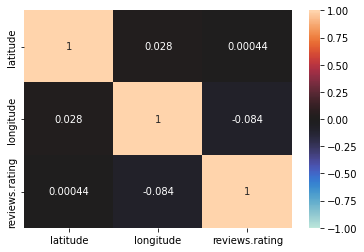

In [72]:
#No interesting correlation between numerical values
sns.heatmap(usercity.corr(),
            annot = True,
            vmin = -1,
            vmax = 1,
            robust = False,
            center=0
            )
plt.show()

**Dropping outliers in reviews.rating**

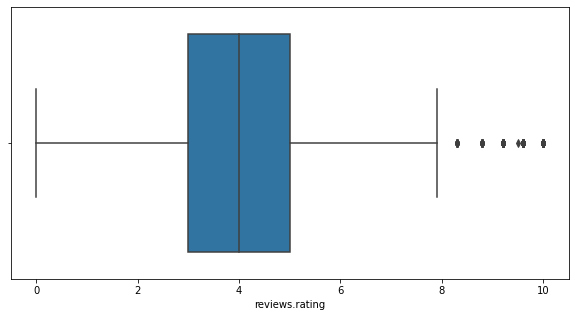

In [73]:
#There are some outliers
fig = plt.figure(figsize=(10,5))
sns.boxplot(x=usercity["reviews.rating"])
plt.show()

In [74]:
#calculate upper and lower limits
upper_limit = usercity["reviews.rating"].mean() + 3 * usercity["reviews.rating"].std()
lower_limit = usercity["reviews.rating"].mean() -3 * usercity["reviews.rating"].std()

#select outliers
display(usercity[["reviews.rating", "reviews.text", "reviews.title"]][~((usercity["reviews.rating"] < upper_limit) & (usercity["reviews.rating"] > lower_limit))].head())

,reviews.rating,reviews.text,reviews.title
12673,0.0,to share your opinion of this businesswith YP ...,Lovely oasis of rest
13176,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,"Friendly staff, clean room."
13325,0.0,to share your opinion of this businesswith YP ...,Great value in fabulous town
13482,0.0,to share your opinion of this businesswith YP ...,The best
13995,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,Ok


Reviews that are 0.0 are likely outliers

In [75]:
# reviews.rating==0.0 are not reliable
usercity[["reviews.text", "reviews.title"]][usercity["reviews.rating"]==0.0].head(50)

,reviews.text,reviews.title
12673,to share your opinion of this businesswith YP ...,Lovely oasis of rest
13176,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,"Friendly staff, clean room."
13325,to share your opinion of this businesswith YP ...,Great value in fabulous town
13482,to share your opinion of this businesswith YP ...,The best
13995,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,Ok
14227,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,Amazing Hotel with Great Character!
14241,to share your opinion of this businesswith YP ...,Very cool hotel in South Dakota
14375,to share your opinion of this businesswith YP ...,Beautiful and Relaxing!
14665,to share your opinion of this businesswith YP ...,So Peaceful Beautiful
14759,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,I will NEVER stay here agan.


In [76]:
#Less than 0.3% of data has reviews.rating 0.0

zeros = usercity[usercity["reviews.rating"]==0.0].count()
perc_zeros = (zeros/usercity.shape[0])*100
perc_zeros

address                 0.20922
categories              0.20922
city                    0.20922
country                 0.20922
latitude                0.20922
longitude               0.20922
name                    0.20922
postalCode              0.20922
province                0.20922
reviews.date            0.20922
reviews.rating          0.20922
reviews.text            0.20922
reviews.title           0.20922
reviews.userCity        0.20922
reviews.userProvince    0.20922
reviews.username        0.20922
dtype: float64

In [77]:
#Dropping reviews.rating==0.0 because these are less than 0.2% of data

usercity.drop(usercity[usercity['reviews.rating'] == 0.0].index, inplace=True)

# -> use reset_index for assigning unique indexes
usercity.reset_index(inplace=True)

#reset_index results in the formation of a unique index column that contains original indexes
#-> drop the index column
usercity.drop(columns="index", inplace=True)

In [78]:
#No of rows after dropping reviews.rating == 0.0
usercity.shape[0]

28141

Some **reviews.ratings** are between **1 and 5**, some are between **1 and 10**

In [79]:
#unique elements of reviews.rating
usercity["reviews.rating"].unique()

array([ 2. ,  5. ,  4. ,  1. ,  3. ,  4.1,  3.3, 10. ,  9.6,  9.2,  7.1,
        7.9,  8.8,  8.3,  4.3,  4.8,  3.9,  2.8,  4.5,  4.4,  4.7,  1.5,
        4.9,  4.6,  3.1,  6.3,  5.8,  7.5,  5.4,  6.7,  2.5,  6. ,  2.9,
        4.2,  7. ,  9.5])

In [80]:
#The majority of reviews.rating is between 0 and 5
usercity[usercity["reviews.rating"] > 5.0].count()

address                 297
categories              297
city                    297
country                 297
latitude                297
longitude               297
name                    297
postalCode              297
province                297
reviews.date            297
reviews.rating          297
reviews.text            297
reviews.title           297
reviews.userCity        297
reviews.userProvince    297
reviews.username        297
dtype: int64

In [81]:
#Less than 2% of data has reviews.rating over 5.0

one_to_ten = usercity[usercity["reviews.rating"]>5.0].count()
perc_one_to_ten = (one_to_ten/usercity.shape[0])*100
perc_one_to_ten

address                 1.0554
categories              1.0554
city                    1.0554
country                 1.0554
latitude                1.0554
longitude               1.0554
name                    1.0554
postalCode              1.0554
province                1.0554
reviews.date            1.0554
reviews.rating          1.0554
reviews.text            1.0554
reviews.title           1.0554
reviews.userCity        1.0554
reviews.userProvince    1.0554
reviews.username        1.0554
dtype: float64

In [82]:
#Dropping hotels with reviews.rating > 5.0 because these are less than 2% of the data
usercity.drop(usercity["name"][usercity["reviews.rating"]>5.0].index, inplace=True)

#resetting index after dropping rows
usercity.reset_index(inplace=True)

#reset_index results in the formation of a unique index column that contains original indexes
#-> drop the index column
usercity.drop(columns="index", inplace=True)

In [83]:
#Dropping reviews.rating > 5.0 worked
usercity["name"][usercity["reviews.rating"]>5.0].count()

0

In [84]:
#No of rows after dropping reviews.rating == 0.0
usercity.shape[0]

27844

**Categories**

In [85]:
usercity["categories"].unique()

array(['Hotels,Hotels and motels,Travel agencies and bureaus,Hotel and Motel Management,Hotel & Motel Management,Motels,Hotel',
       'Hotels,Hotels and motels,Hotel and motel reservations,Corporate Lodging,Lodging,Real estate,Hotel',
       'Hotels,Caterers,Hotels and motels,Hotel,Restaurants', ...,
       'Hotels,hotel', 'Motels,Hotels,Bed & Breakfast & Inns,Lodging',
       'Cabins,Resorts & Vacation Cottages,Wedding Chapels,Vacation Home Rental,Hotels,Bowling Alleys,Hotels & Motels,Hotel,Cabin Cottage & Chalet Rental,Resorts,Real Estate Developers,Home Builders,Resortresort_hotel'],
      dtype=object)

In [86]:
#dropping categories as these are not informative
usercity.drop(columns=["categories"], inplace=True)

**Generating primary keys** 
- because the dataset will be imported into SANDBOX (type of postgresql database system)

In [87]:
#inserting an empty column called keys
usercity.insert(3, "keys", "")

In [88]:
#Filling the key column with unique row index
for i in range(0, usercity.shape[0]):
    counter+=1
    usercity.loc[i, ["keys"]] = i

In [89]:
#Final overview
usercity.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,7520 Teague Rd,Hanover,US,0,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-15,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016
1,7520 Teague Rd,Hanover,US,1,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-07-09,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne
2,7520 Teague Rd,Hanover,US,2,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-06-11,5.0,I stayed here with my family for my daughters ...,Wonderful stay,Laurel,MD,kevan777
3,7520 Teague Rd,Hanover,US,3,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-06-24,5.0,We stayed here while visiting Maryland Live!. ...,Great Hotel Experiece!,Clayton,NC,DebMurphy57
4,7520 Teague Rd,Hanover,US,4,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2016-05-29,5.0,"I travel a lot with my job, so I'm constantly ...",Short stay for business.,Boston,MA,kayleighwillswim1224


In [90]:
#Double-checking shape
usercity.shape

(27844, 16)

In [91]:
#Double-checking nulls

nulls= usercity.isnull().sum()

perc_nulls = (nulls/usercity.shape[0]) *100

In [92]:
#Renaming columns to be more understandable to potential users
usercity.rename(columns={'reviews.username': 'username','province': 'hotel_province', "address":"hotel_address", 'name': 'hotel_name', "city":"hotel_city", "country":"hotel_country", "latitude":"hotel_latitude", "longitude":"hotel_longitude", 'postalCode': 'hotel_postcode', "reviews.date":"review_date", "reviews.rating":"review_rating", "reviews.text":"review_text", "reviews.title":"review_title", "reviews.userCity": "user_city", "reviews.userProvince":"user_province_or_country"}, inplace=True)

In [93]:
usercity.columns

Index(['hotel_address', 'hotel_city', 'hotel_country', 'keys',
       'hotel_latitude', 'hotel_longitude', 'hotel_name', 'hotel_postcode',
       'hotel_province', 'review_date', 'review_rating', 'review_text',
       'review_title', 'user_city', 'user_province_or_country', 'username'],
      dtype='object')

In [95]:
usercity.to_csv('hotel_review_data.csv', index = False, header = True)